In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import highlight_text
from mplsoccer.pitch import Pitch, VerticalPitch
import matplotlib.cm as mpl_cm
from matplotlib import pyplot as plt, patheffects

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [31]:
df = pd.read_csv('MD28 - Atletico Madrid 2-4 Barcelona.csv')

In [33]:
team  = df[df['teamName'] == 'Barcelona']

In [35]:
#pearl_earring_cmap = mpl_cm.get_cmap('coolwarm')

C:\Users\risha\AppData\Local\Temp\ipykernel_28396\3390657999.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  pearl_earring_cmap = mpl_cm.get_cmap('coolwarm')


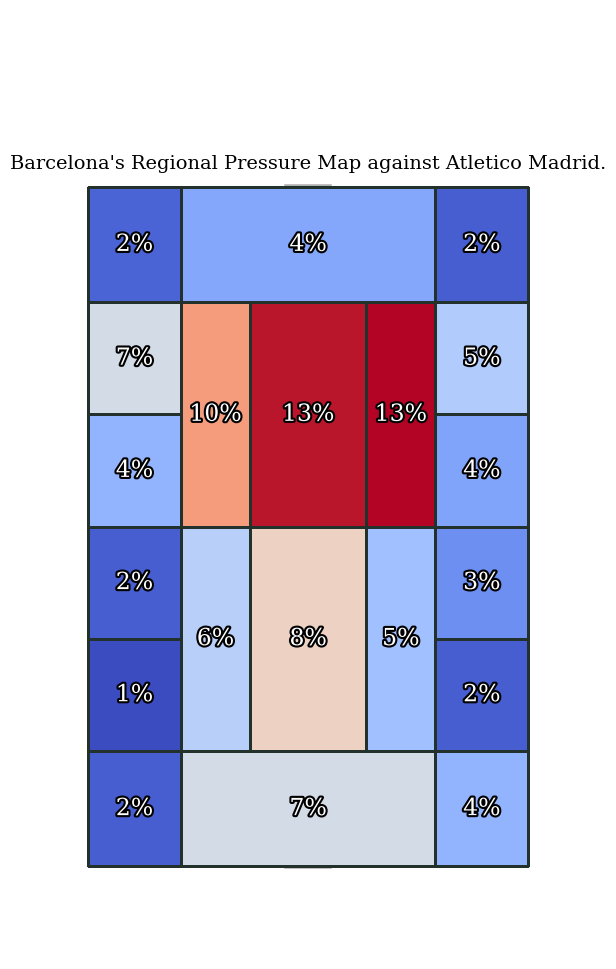

In [37]:
pitch = VerticalPitch(positional=True, pitch_type='opta')

# Create figure and axis (figheight > figwidth for vertical layout)
fig, axs = pitch.grid(ncols=1, nrows=1, figheight=10, axis=False)
ax = axs['pitch']

# Add title
fig.suptitle("Barcelona's Regional Pressure Map against Atletico Madrid.", fontsize=14, fontfamily = 'serif', y = 0.83)


# Define colormap and path effects
pearl_earring_cmap = mpl_cm.get_cmap('coolwarm')
path_eff = [patheffects.withStroke(linewidth=3, foreground='black')]

# Compute positional bin statistics
bin_statistic = pitch.bin_statistic_positional(
    team.x, team.y, statistic='count', positional='full', normalize=True
)

# Plot heatmap
pitch.heatmap_positional(bin_statistic, ax=ax, cmap=pearl_earring_cmap, edgecolors='#22312b')

# Add labels
pitch.label_heatmap(bin_statistic, color='white', fontsize=17, fontfamily = 'serif',
                    ax=ax, ha='center', va='center',
                    str_format='{:.0%}', path_effects=path_eff) ##f4edf0

plt.show()